Lab Report

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hyperloglog import *
from datagen import *
from slidehyperloglog import *
from matplotlib import pyplot as plt
import time
import pandas as pd
import numpy as np

# 1. Effect of hashes on HyperLogLog

In [35]:
# Experiment Setup
fnames = ['ip.txt','uuid.txt']
hashes = [hash_mmh3,hash_citi, hash_md5, hash_sha256]
accuracy = []
performance = []
itr = 20

In [37]:
# Experiment
for i in range(itr):
    print('iteration ',i)
    ip_gen(10000000)
    uuid_gen(10000000)
    for fname in fnames:
        e_count = exact_count(fname)
        for hash in hashes:
            f = open(fname, 'r')
            hll = HyperLogLog(0.01,hash)
            start = time.time()
            for l in f:
                ls = l.split()
                for w in ls:
                    hll.add(w)
            end = time.time()
            h_count = hll.card()
            acc = math.fabs((h_count - e_count)/float(e_count))
            performance.append(end-start)
            accuracy.append(acc)
print('accuracy:',accuracy)
print('performance:',performance)

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
accuracy: [0.0004997849125136334, 0.0013001470438703568, 0.0018565863835648053, 0.019891790534300183, 0.012302387221746706, 0.007148410242827237, 0.006671876458385028, 0.006906297275343724, 0.011123998557128338, 0.0035026154118036885, 0.01563897489146868, 0.004987015684401097, 0.0093275104165731, 0.0017614481637081131, 0.007290509834144451, 0.002697285826525092, 0.0021528680780851035, 0.0005945468975735111, 0.00558561190320526, 0.009821470200659758, 0.010811153846039064, 0.008623330360766127, 0.0035163499633558094, 0.0010390869743248448, 0.0046315425378629736, 0.017472777983663184, 0.002122113403685203, 0.002688463291244777, 0.007610492282237857, 0.019546423641556874, 0.015011753229423984, 0.006761335727519356, 0.0045809

In [38]:
np_acc = np.array(accuracy).reshape(-1,2,4)
np_perf = np.array(performance).reshape(-1,2,4)
np_acc

array([[[4.99784913e-04, 1.30014704e-03, 1.85658638e-03, 1.98917905e-02],
        [1.23023872e-02, 7.14841024e-03, 6.67187646e-03, 6.90629728e-03]],

       [[1.11239986e-02, 3.50261541e-03, 1.56389749e-02, 4.98701568e-03],
        [9.32751042e-03, 1.76144816e-03, 7.29050983e-03, 2.69728583e-03]],

       [[2.15286808e-03, 5.94546898e-04, 5.58561190e-03, 9.82147020e-03],
        [1.08111538e-02, 8.62333036e-03, 3.51634996e-03, 1.03908697e-03]],

       [[4.63154254e-03, 1.74727780e-02, 2.12211340e-03, 2.68846329e-03],
        [7.61049228e-03, 1.95464236e-02, 1.50117532e-02, 6.76133573e-03]],

       [[4.58090864e-03, 2.15903516e-04, 4.44224544e-04, 1.62251335e-03],
        [8.73968532e-03, 3.69526624e-03, 4.59910550e-03, 9.33819989e-03]],

       [[4.93624751e-03, 1.19004449e-02, 4.75333431e-03, 4.37608764e-03],
        [7.29313109e-03, 1.18260078e-02, 1.18333761e-03, 1.08382405e-02]],

       [[2.82782452e-03, 8.94277215e-03, 6.97056541e-04, 1.60958191e-02],
        [6.09047935e-03, 5

In [39]:
acc_avg = np.sum(np_acc, axis=0)/itr
perf_avg = np.sum(np_perf, axis=0)/itr
acc_avg

array([[0.01122076, 0.01300563, 0.01015229, 0.0162125 ],
       [0.01463341, 0.01375636, 0.01283585, 0.01240459]])

In [40]:
# Visualization

df_acc = pd.DataFrame(acc_avg,columns=['MMH3','CITI','MD5','SHA256'],index=['IP','UUID'])
df_perf = pd.DataFrame(perf_avg,columns=['MMH3','CITI','MD5','SHA256'],index=['IP','UUID'])

In [41]:
# Accuracy plot
df_acc

,MMH3,CITI,MD5,SHA256
IP,0.011221,0.013006,0.010152,0.016212
UUID,0.014633,0.013756,0.012836,0.012405


In [42]:
# Performance plot
df_perf

,MMH3,CITI,MD5,SHA256
IP,31.367095,24.724390,44.918669,48.021795
UUID,31.368166,25.544332,46.451399,49.645152


In [43]:
fnames = ['soc-pokec-relationships.txt','words.txt']
hashes = [hash_mmh3,hash_citi, hash_md5, hash_sha256]
accuracy = []
performance = []
itr = 1

In [44]:
for i in range(itr):
    for fname in fnames:
        e_count = exact_count(fname)
        for hash in hashes:
            f = open(fname, 'r')
            hll = HyperLogLog(0.01,hash)
            start = time.time()
            for l in f:
                ls = l.split()
                for w in ls:
                    hll.add(w)
            end = time.time()
            h_count = hll.card()
            acc = math.fabs((h_count - e_count)/float(e_count))
            performance.append(end-start)
            accuracy.append(acc)
print('accuracy:',accuracy)
print('performance:',performance)

accuracy: [0.006488327028151294, 0.01370168013630983, 0.0036800517046685897, 0.005287537401603748, 0.005382803905670044, 0.0007539357337063901, 0.021271061690573575, 0.016243951272711804]
performance: [82.56764388084412, 64.53615403175354, 127.70836210250854, 136.11433291435242, 0.703498125076294, 0.5698332786560059, 1.0291848182678223, 1.102952241897583]


In [48]:
np_acc = np.array(accuracy).reshape(-1,2,4)
np_perf = np.array(performance).reshape(-1,2,4)
acc_avg = np.sum(np_acc, axis=0)/itr
perf_avg = np.sum(np_perf, axis=0)/itr
df_acc = pd.DataFrame(acc_avg,columns=['MMH3','CITI','MD5','SHA256'],index=['SOCIAL','WORD'])#,'Social'])
df_perf = pd.DataFrame(perf_avg,columns=['MMH3','CITI','MD5','SHA256'],index=['SOCIAL','WORD'])#,'Social'])

In [49]:
df_acc

,MMH3,CITI,MD5,SHA256
SOCIAL,0.006488,0.013702,0.003680,0.005288
WORD,0.005383,0.000754,0.021271,0.016244


In [50]:
df_perf

,MMH3,CITI,MD5,SHA256
SOCIAL,82.567644,64.536154,127.708362,136.114333
WORD,0.703498,0.569833,1.029185,1.102952


# 2. HyperLogLog on a sliding window

In [2]:
w_max = 40
w = 5
fname = 'ip_stream.txt'
start_time = 1636101408
end_time = 1636101447

In [3]:
ip_stream = np.loadtxt(fname,dtype='str')

In [42]:
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
df

,timestamp,ip
0,1636101408.0,207.43.142.113
1,1636101408.0,245.225.220.129
2,1636101408.0,141.229.163.2
3,1636101408.0,8.241.104.38
4,1636101409.0,49.203.81.111
...,...,...
14999969,1636101447.0,163.147.87.138
14999970,1636101447.0,62.68.15.199
14999971,1636101447.0,232.248.74.172
14999972,1636101447.0,76.70.14.235


Text(0, 0.5, 'IP count')

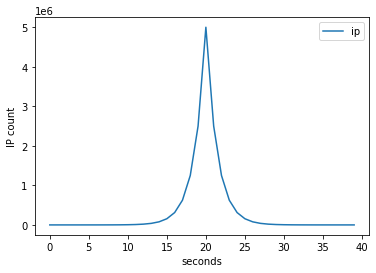

In [43]:
#df.set_index('timestamp', inplace=True)
df = df.groupby(['timestamp'])['ip'].count().reset_index().plot()
plt.xlabel('seconds')
plt.ylabel('IP count')

In [7]:
ip_map = exact_streaming_map(fname)

In [12]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 4]
[0.0, 4.000488360737401]
iteration  2
[0, 4, 13]
[0.0, 4.000488360737401, 13.005160200480178]
iteration  3
[0, 4, 13, 32]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119]
iteration  4
[0, 4, 13, 32, 70]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246]
iteration  5
[0, 4, 13, 32, 70, 142]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023]
iteration  6
[0, 4, 13, 32, 70, 142, 285]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023, 284.4550918849854]
iteration  7
[0, 4, 13, 32, 70, 142, 285, 571]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023, 284.4550918849854, 571.8650430733145]
iteration  8
[0, 4, 13, 32, 70, 142, 285, 571, 1143]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023, 284.4550

[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73238, 146480, 292957, 585895, 1171712, 2343051, 4684569, 9363258, 11231801, 11228541, 9353668, 4674009, 2336289]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023, 284.4550918849854, 571.8650430733145, 1134.379694802951, 2270.2713781658913, 4583.234704854682, 9239.397186052884, 18275.98074407033, 36815.31393993693, 73022.64765987308, 147496.78897547562, 295024.1032218351, 588745.492894155, 1180031.7736382307, 2342622.7422445705, 4790635.444977439, 9469026.68856686, 11167721.82827075, 11235760.566527577, 9357817.167743763, 4707907.554141667, 2341278.1876570554]
iteration  27
[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73238, 146480, 292957, 585895, 1171712, 2343051, 4684569, 9363258, 11231801, 11228541, 9353668, 4674009, 2336289, 1167939]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.618935244850

[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73238, 146480, 292957, 585895, 1171712, 2343051, 4684569, 9363258, 11231801, 11228541, 9353668, 4674009, 2336289, 1167939, 583991, 291965, 145999, 73006, 36503, 18246, 9121, 4563, 2279]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023, 284.4550918849854, 571.8650430733145, 1134.379694802951, 2270.2713781658913, 4583.234704854682, 9239.397186052884, 18275.98074407033, 36815.31393993693, 73022.64765987308, 147496.78897547562, 295024.1032218351, 588745.492894155, 1180031.7736382307, 2342622.7422445705, 4790635.444977439, 9469026.68856686, 11167721.82827075, 11235760.566527577, 9357817.167743763, 4707907.554141667, 2341278.1876570554, 1173295.8325522433, 582868.8635103913, 289300.2873112305, 146529.25957274518, 73882.02974204962, 36768.084158023754, 18291.24297153635, 9132.53511248584, 4562.083822459471, 2280.612274052497]
iteration  37
[0, 4, 13, 32, 70, 142, 285, 5

In [16]:
print(hll_cnt)
print(exact_cnt)

[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 142.61893524485023, 284.4550918849854, 571.8650430733145, 1134.379694802951, 2270.2713781658913, 4583.234704854682, 9239.397186052884, 18275.98074407033, 36815.31393993693, 73022.64765987308, 147496.78897547562, 295024.1032218351, 588745.492894155, 1180031.7736382307, 2342622.7422445705, 4790635.444977439, 9469026.68856686, 11167721.82827075, 11235760.566527577, 9357817.167743763, 4707907.554141667, 2341278.1876570554, 1173295.8325522433, 582868.8635103913, 289300.2873112305, 146529.25957274518, 73882.02974204962, 36768.084158023754, 18291.24297153635, 9132.53511248584, 4562.083822459471, 2280.612274052497, 1134.379694802951, 566.6882601935041, 282.42019155323976]
[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73238, 146480, 292957, 585895, 1171712, 2343051, 4684569, 9363258, 11231801, 11228541, 9353668, 4674009, 2336289, 1167939, 583991, 291965, 145999, 73006, 36503, 18246, 9121

In [34]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.000122
2,0.000397
3,0.000978
4,0.002142
5,0.004359
6,0.001912
7,0.001515
8,0.007542
9,0.007315


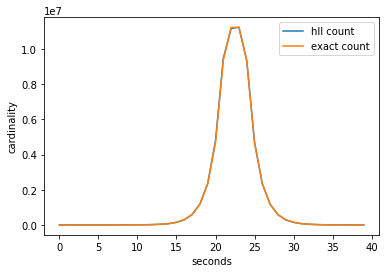

In [36]:
plt.plot(hll_cnt)
plt.plot(exact_cnt)
plt.xlabel('seconds')
plt.ylabel('cardinality')
plt.legend(["hll count", "exact count"])

Text(0, 0.5, 'accuracy')

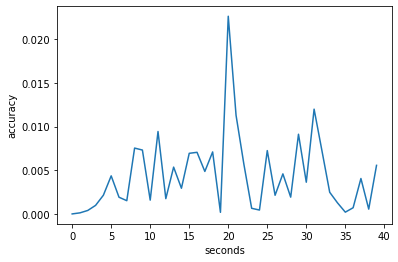

In [37]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')

In [20]:
w_max = 40
w = 5
fname = 'ip_stream_2.txt'
start_time = 1636194789
end_time = 1636194828

In [16]:
ip_stream = np.loadtxt(fname,dtype='str')
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
len(df)

20000000

Text(0, 0.5, 'IP count')

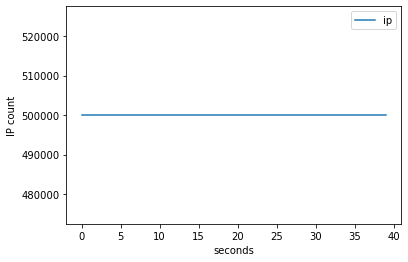

In [17]:
df = df.groupby(['timestamp'])['ip'].count().reset_index().plot()
plt.xlabel('seconds')
plt.ylabel('IP count')

In [18]:
ip_map = exact_streaming_map(fname)

In [21]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 499974]
[0.0, 494993.9113692318]
iteration  2
[0, 499974, 999877]
[0.0, 494993.9113692318, 1001351.0207353587]
iteration  3
[0, 499974, 999877, 1499736]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008]
iteration  4
[0, 499974, 999877, 1499736, 1999527]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 1979785.3495499068]
iteration  5
[0, 499974, 999877, 1499736, 1999527, 1999309]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 1979785.3495499068, 2002188.03554128]
iteration  6
[0, 499974, 999877, 1499736, 1999527, 1999309, 1999087]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 1979785.3495499068, 2002188.03554128, 2031343.9633151086]
iteration  7
[0, 499974, 999877, 1499736, 1999527, 1999309, 1999087, 1998874]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 1979785.3495499068, 2002188.03554128, 2031343.9633151086, 2008844.564704285]
iteration  8
[0, 499974, 999877

[0, 499974, 999877, 1499736, 1999527, 1999309, 1999087, 1998874, 1998645, 1998391, 1998164, 1997923, 1997699, 1997400, 1997166, 1996879, 1996649, 1996485, 1996246, 1996025, 1995770, 1995576, 1995302, 1995032, 1994775]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 1979785.3495499068, 2002188.03554128, 2031343.9633151086, 2008844.564704285, 2003501.34453862, 2020999.2756472938, 2018537.1849674124, 2018676.921662502, 2010775.3480791613, 1977960.0751411594, 1993147.78122101, 1970058.1788052048, 1970336.7218459623, 1995421.187899527, 1991473.4817688116, 2006488.844522097, 2020144.0996692393, 2013811.80391872, 1991924.6168672184, 1980795.8395544107, 1978435.6475851361]
iteration  25
[0, 499974, 999877, 1499736, 1999527, 1999309, 1999087, 1998874, 1998645, 1998391, 1998164, 1997923, 1997699, 1997400, 1997166, 1996879, 1996649, 1996485, 1996246, 1996025, 1995770, 1995576, 1995302, 1995032, 1994775, 1994462]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 197

[0, 499974, 999877, 1499736, 1999527, 1999309, 1999087, 1998874, 1998645, 1998391, 1998164, 1997923, 1997699, 1997400, 1997166, 1996879, 1996649, 1996485, 1996246, 1996025, 1995770, 1995576, 1995302, 1995032, 1994775, 1994462, 1994230, 1994124, 1993874, 1993762, 1993580, 1993343, 1993144, 1992868, 1992649]
[0.0, 494993.9113692318, 1001351.0207353587, 1497334.4691825008, 1979785.3495499068, 2002188.03554128, 2031343.9633151086, 2008844.564704285, 2003501.34453862, 2020999.2756472938, 2018537.1849674124, 2018676.921662502, 2010775.3480791613, 1977960.0751411594, 1993147.78122101, 1970058.1788052048, 1970336.7218459623, 1995421.187899527, 1991473.4817688116, 2006488.844522097, 2020144.0996692393, 2013811.80391872, 1991924.6168672184, 1980795.8395544107, 1978435.6475851361, 2004009.29915101, 2001880.6350698464, 1994675.7052243378, 2001961.9280811406, 2019375.1723251566, 2014710.8098262378, 2033816.101875188, 2017360.92854011, 2001464.4819599087, 2018758.5005469008]
iteration  35
[0, 499974

In [22]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.009961
2,0.001474
3,0.001601
4,0.009873
5,0.001440
6,0.016136
7,0.004988
8,0.002430
9,0.011313


Text(0, 0.5, 'accuracy')

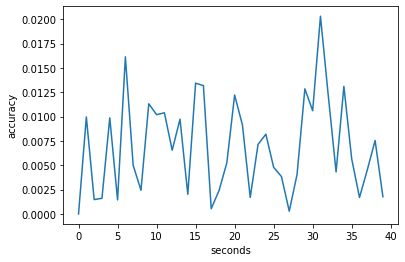

In [23]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')

In [25]:
w_max = 40
w = 5
fname = 'ip_stream_2.txt'
start_time = 1636200035
end_time = 1636200074

In [26]:
ip_stream = np.loadtxt(fname,dtype='str')
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
len(df)

40000

Text(0, 0.5, 'IP count')

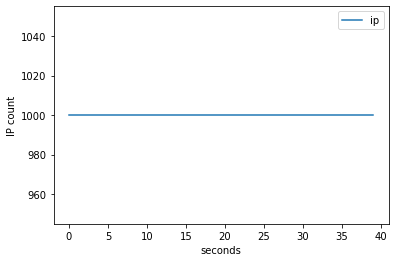

In [27]:
df = df.groupby(['timestamp'])['ip'].count().reset_index().plot()
plt.xlabel('seconds')
plt.ylabel('IP count')

In [28]:
ip_map = exact_streaming_map(fname)

In [29]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 1000]
[0.0, 1007.3423422662145]
iteration  2
[0, 1000, 2000]
[0.0, 1007.3423422662145, 1998.024282586877]
iteration  3
[0, 1000, 2000, 3000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931]
iteration  4
[0, 1000, 2000, 3000, 4000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931, 3997.263835206578]
iteration  5
[0, 1000, 2000, 3000, 4000, 4000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931, 3997.263835206578, 4013.8642808806676]
iteration  6
[0, 1000, 2000, 3000, 4000, 4000, 4000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931, 3997.263835206578, 4013.8642808806676, 4021.5317016586187]
iteration  7
[0, 1000, 2000, 3000, 4000, 4000, 4000, 4000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931, 3997.263835206578, 4013.8642808806676, 4021.5317016586187, 3993.4353505531035]
iteration  8
[0, 1000, 2000, 3000, 4000, 4000, 4000, 4000, 4000]
[0.0, 1007.3423422662145, 1998.0242825

[0, 1000, 2000, 3000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 3999, 3999, 3999, 3999, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931, 3997.263835206578, 4013.8642808806676, 4021.5317016586187, 3993.4353505531035, 3936.1151754693656, 3970.4832104464767, 4006.200446640984, 4034.318715497409, 4033.039564932683, 4025.3667580487745, 4010.031915653262, 3998.540195585832, 3998.540195585832, 4016.4196891366473, 4007.4775034248264, 3994.711412705701, 4030.4815633662065, 3999.8166554049494, 4003.6466316564656, 4011.3092711289023, 4025.3667580487745, 4008.7546597570763, 3997.263835206578, 4013.8642808806676, 4003.6466316564656]
iteration  29
[0, 1000, 2000, 3000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 3999, 3999, 3999, 3999, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000]
[0.0, 1007.3423422662145, 1998.024282586877, 3012.776407369931, 3997.263835206578

In [30]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.007342
2,0.000988
3,0.004259
4,0.000684
5,0.003466
6,0.005383
7,0.001641
8,0.015971
9,0.007379


Text(0, 0.5, 'accuracy')

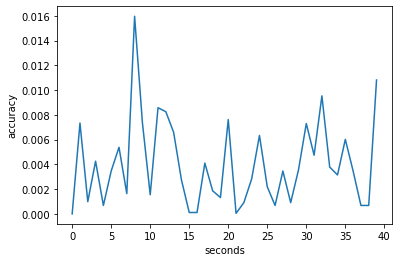

In [31]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')

In [33]:
w_max = 40
w = 5
fname = 'ip_stream_2.txt'
start_time = 1636201253
end_time = 1636201292

In [34]:
ip_stream = np.loadtxt(fname,dtype='str')
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
len(df)

400000

Text(0, 0.5, 'IP count')

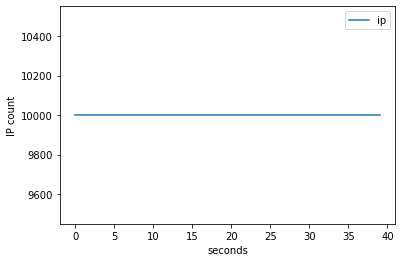

In [35]:
df = df.groupby(['timestamp'])['ip'].count().reset_index().plot()
plt.xlabel('seconds')
plt.ylabel('IP count')

In [36]:
ip_map = exact_streaming_map(fname)

In [37]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 10000]
[0.0, 10003.924706827747]
iteration  2
[0, 10000, 20000]
[0.0, 10003.924706827747, 20162.318489533085]
iteration  3
[0, 10000, 20000, 30000]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423]
iteration  4
[0, 10000, 20000, 30000, 40000]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666]
iteration  5
[0, 10000, 20000, 30000, 40000, 40000]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666, 40069.503012764515]
iteration  6
[0, 10000, 20000, 30000, 40000, 40000, 40000]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666, 40069.503012764515, 39524.832357003645]
iteration  7
[0, 10000, 20000, 30000, 40000, 40000, 40000, 40000]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666, 40069.503012764515, 39524.832357003645, 41120.43572396486]
iteration  8
[0, 10000, 20000, 30000, 40000, 40000, 40000, 40000,

[0, 10000, 20000, 30000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 39999, 39999, 39998, 39997, 39998, 39997, 39997, 39998, 39997, 39997, 39998, 39998, 39998]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666, 40069.503012764515, 39524.832357003645, 41120.43572396486, 41199.398297023115, 41209.065232048146, 41255.81685336155, 41329.366736472584, 41199.24962349018, 41106.68241151109, 40968.389271300264, 39681.83287391469, 40961.051900024104, 40997.77402038133, 40185.29148054766, 41189.36100429664, 40977.47813797361, 39347.22628176951, 39314.138421314834, 41003.62891506651, 39977.45782685212, 39670.56852145998]
iteration  26
[0, 10000, 20000, 30000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 39999, 39999, 39998, 39997, 39998, 39997, 39997, 39998, 39997, 39997, 39998, 39998, 39998, 39999]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666, 40069.503012764515, 39524.832357003645, 4112

[0, 10000, 20000, 30000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000, 39999, 39999, 39998, 39997, 39998, 39997, 39997, 39998, 39997, 39997, 39998, 39998, 39998, 39999, 39997, 39997, 39997, 39997, 39997, 39997, 39997, 39994, 39996, 39996]
[0.0, 10003.924706827747, 20162.318489533085, 29853.663863884423, 41070.21223188666, 40069.503012764515, 39524.832357003645, 41120.43572396486, 41199.398297023115, 41209.065232048146, 41255.81685336155, 41329.366736472584, 41199.24962349018, 41106.68241151109, 40968.389271300264, 39681.83287391469, 40961.051900024104, 40997.77402038133, 40185.29148054766, 41189.36100429664, 40977.47813797361, 39347.22628176951, 39314.138421314834, 41003.62891506651, 39977.45782685212, 39670.56852145998, 39636.82185659401, 39920.19107858124, 41208.17472885767, 39977.45782685212, 39885.926862537766, 39524.832357003645, 40069.503012764515, 41329.32357390318, 41630.807154707574, 41460.062230383795, 41441.10793060132]
iteration  37
[0, 10000, 20000, 30000,

In [38]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.000392
2,0.008116
3,0.004878
4,0.026755
5,0.001738
6,0.011879
7,0.028011
8,0.029985
9,0.030227


Text(0, 0.5, 'accuracy')

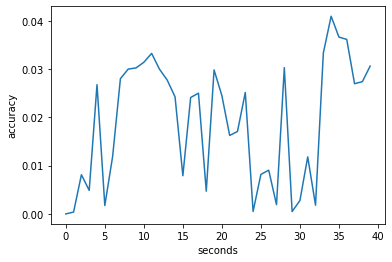

In [39]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')

In [49]:
w_max = 40
w = 2
fname = 'ip_stream.txt'
start_time = 1636101408
end_time = 1636101447

In [44]:
ip_stream = np.loadtxt(fname,dtype='str')
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
len(df)

14999974

In [45]:
ip_map = exact_streaming_map(fname)

In [50]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 4]
[0.0, 4.000488360737401]
iteration  2
[0, 4, 9]
[0.0, 4.000488360737401, 9.002472829445734]
iteration  3
[0, 4, 9, 19]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503]
iteration  4
[0, 4, 9, 19, 38]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234]
iteration  5
[0, 4, 9, 19, 38, 76]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842]
iteration  6
[0, 4, 9, 19, 38, 76, 152]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842, 152.70946952943572]
iteration  7
[0, 4, 9, 19, 38, 76, 152, 305]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842, 152.70946952943572, 304.81800775499613]
iteration  8
[0, 4, 9, 19, 38, 76, 152, 305, 610]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842, 152.70946952943572, 304.8180

[0, 4, 9, 19, 38, 76, 152, 305, 610, 1220, 2441, 4882, 9765, 19531, 39060, 78124, 156242, 312469, 624877, 1249463, 2497760, 4991158, 2493420, 1246203, 622887, 311499, 155700]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842, 152.70946952943572, 304.81800775499613, 608.1483949262023, 1217.1083534744191, 2445.7994173261714, 4879.556264623786, 9780.785736475053, 19256.673904383162, 39106.11958955041, 78182.8688149113, 156864.07152394147, 312236.62424506753, 629163.4531378011, 1248427.6366827632, 2539224.022988708, 4954113.569412816, 2511695.072485221, 1263131.148842716, 619839.9787470666, 310366.97434183507, 156294.12431209817]
iteration  27
[0, 4, 9, 19, 38, 76, 152, 305, 610, 1220, 2441, 4882, 9765, 19531, 39060, 78124, 156242, 312469, 624877, 1249463, 2497760, 4991158, 2493420, 1246203, 622887, 311499, 155700, 77853]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842, 152.70946952943572,

[0, 4, 9, 19, 38, 76, 152, 305, 610, 1220, 2441, 4882, 9765, 19531, 39060, 78124, 156242, 312469, 624877, 1249463, 2497760, 4991158, 2493420, 1246203, 622887, 311499, 155700, 77853, 38939, 19473, 9734, 4860, 2436, 1216, 609, 302, 152, 76]
[0.0, 4.000488360737401, 9.002472829445734, 19.01102537037503, 38.04413563960234, 76.17681653907842, 152.70946952943572, 304.81800775499613, 608.1483949262023, 1217.1083534744191, 2445.7994173261714, 4879.556264623786, 9780.785736475053, 19256.673904383162, 39106.11958955041, 78182.8688149113, 156864.07152394147, 312236.62424506753, 629163.4531378011, 1248427.6366827632, 2539224.022988708, 4954113.569412816, 2511695.072485221, 1263131.148842716, 619839.9787470666, 310366.97434183507, 156294.12431209817, 78135.50742935111, 39149.69408332029, 19511.301862531658, 9793.506939487834, 4878.209394632479, 2435.3537682633923, 1220.3400179051596, 607.1106118696413, 302.78057692479064, 152.70946952943572, 75.17218705107386]
iteration  38
[0, 4, 9, 19, 38, 76, 15

In [51]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.000122
2,0.000275
3,0.000580
4,0.001161
5,0.002327
6,0.004668
7,0.000597
8,0.003035
9,0.002370


Text(0, 0.5, 'accuracy')

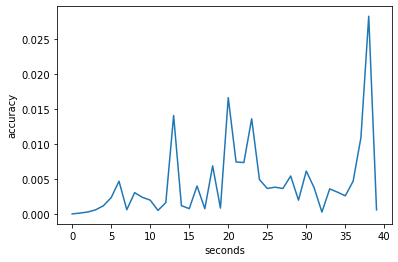

In [52]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')

In [53]:
w_max = 40
w = 10
fname = 'ip_stream.txt'
start_time = 1636101408
end_time = 1636101447

In [54]:
ip_stream = np.loadtxt(fname,dtype='str')
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
len(df)

14999974

In [55]:
ip_map = exact_streaming_map(fname)

In [56]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 4]
[0.0, 4.000488360737401]
iteration  2
[0, 4, 13]
[0.0, 4.000488360737401, 13.005160200480178]
iteration  3
[0, 4, 13, 32]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119]
iteration  4
[0, 4, 13, 32, 70]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246]
iteration  5
[0, 4, 13, 32, 70, 146]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6544032455492]
iteration  6
[0, 4, 13, 32, 70, 146, 298]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6544032455492, 297.6881080434585]
iteration  7
[0, 4, 13, 32, 70, 146, 298, 603]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6544032455492, 297.6881080434585, 605.0352429391324]
iteration  8
[0, 4, 13, 32, 70, 146, 298, 603, 1213]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6544032455492, 297.68810804

[0, 4, 13, 32, 70, 146, 298, 603, 1213, 2433, 4870, 9743, 19489, 38982, 77966, 155938, 311875, 623734, 1247391, 2494413, 4987291, 9968684, 12442573, 13649716, 14194479, 14349736, 14192967]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6544032455492, 297.6881080434585, 605.0352429391324, 1206.3407400479546, 2420.2773559449156, 4871.476704995925, 9822.621118628298, 19560.725731081606, 39019.31673750471, 78014.3167663324, 157722.26167519848, 313842.78795014974, 627406.8665468765, 1251762.0575515025, 2491929.375416261, 5078364.07500501, 10065570.803789042, 12435272.655195402, 13697669.591793023, 14272721.269129777, 14390847.196369085, 14224015.06004652]
iteration  27
[0, 4, 13, 32, 70, 146, 298, 603, 1213, 2433, 4870, 9743, 19489, 38982, 77966, 155938, 311875, 623734, 1247391, 2494413, 4987291, 9968684, 12442573, 13649716, 14194479, 14349736, 14192967, 13645943]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6

[0, 4, 13, 32, 70, 146, 298, 603, 1213, 2433, 4870, 9743, 19489, 38982, 77966, 155938, 311875, 623734, 1247391, 2494413, 4987291, 9968684, 12442573, 13649716, 14194479, 14349736, 14192967, 13645943, 12435419, 9957132, 4975708, 2487148, 1243381, 621710, 310820, 155422, 77721]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 146.6544032455492, 297.6881080434585, 605.0352429391324, 1206.3407400479546, 2420.2773559449156, 4871.476704995925, 9822.621118628298, 19560.725731081606, 39019.31673750471, 78014.3167663324, 157722.26167519848, 313842.78795014974, 627406.8665468765, 1251762.0575515025, 2491929.375416261, 5078364.07500501, 10065570.803789042, 12435272.655195402, 13697669.591793023, 14272721.269129777, 14390847.196369085, 14224015.06004652, 13651789.351621626, 12456037.677303212, 9954172.445651587, 5008218.089743893, 2488498.758731567, 1249325.1252532552, 622648.03347267, 308554.79588964325, 155226.25493480064, 78625.76641328879]
iteration  37
[0, 4, 

In [57]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.000122
2,0.000397
3,0.000978
4,0.002142
5,0.004482
6,0.001047
7,0.003375
8,0.005490
9,0.005229


Text(0, 0.5, 'accuracy')

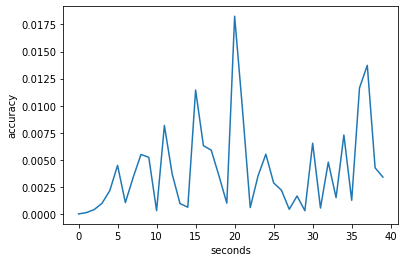

In [58]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')

In [73]:
w_max = 40
w = 5
fname = 'ip_stream_3.txt'
start_time = 1636246672
end_time = 1636246711

In [74]:
ip_stream = np.loadtxt(fname,dtype='str')
df = pd.DataFrame(data=ip_stream, columns=["timestamp", "ip"])
len(df)

14999974

In [75]:
ip_map = exact_streaming_map(fname)

In [76]:
hll_cnt=[]
exact_cnt=[]
hll = SlideHyperLogLog(0.01, hash_mmh3, w_max)
for i in range(start_time,end_time+1):
    print('iteration ',i-start_time)
    exact_cnt.append(exact_streaming_count(ip_map,w,i))
    hll_cnt.append(hll.card(w,i))
    f = open(fname,'r')
    for l in f:
        t,ip = l.split()
        if(float(t) == i):
            hll.add((t,ip))    
    print(exact_cnt)
    print(hll_cnt)

iteration  0
[0]
[0.0]
iteration  1
[0, 4]
[0.0, 4.000488360737401]
iteration  2
[0, 4, 13]
[0.0, 4.000488360737401, 13.005160200480178]
iteration  3
[0, 4, 13, 32]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119]
iteration  4
[0, 4, 13, 32, 70]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246]
iteration  5
[0, 4, 13, 32, 70, 142]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.61022353143528]
iteration  6
[0, 4, 13, 32, 70, 142, 285]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.61022353143528, 285.47263683454185]
iteration  7
[0, 4, 13, 32, 70, 142, 285, 571]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.61022353143528, 285.47263683454185, 573.9362143041851]
iteration  8
[0, 4, 13, 32, 70, 142, 285, 571, 1143]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.61022353143528, 285.47

[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73239, 146481, 292958, 585900, 1171709, 2343057, 4684620, 9363281, 11231903, 11228524, 9353673, 4673931, 2336167]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.61022353143528, 285.47263683454185, 573.9362143041851, 1139.7390223179432, 2300.1629028420116, 4621.640412938958, 9255.222891603173, 18205.95703811289, 36358.2299267002, 73116.75476377748, 145011.97074347571, 290480.9855512473, 587016.7175221652, 1168707.8162622743, 2344634.4028057326, 4689729.400427136, 9380274.850424137, 11234464.803885384, 11209976.25239457, 9330299.324310564, 4643825.13793286, 2327926.2815592443]
iteration  27
[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73239, 146481, 292958, 585900, 1171709, 2343057, 4684620, 9363281, 11231903, 11228524, 9353673, 4673931, 2336167, 1167933]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.6102235314

[0, 4, 13, 32, 70, 142, 285, 571, 1143, 2287, 4576, 9153, 18308, 36619, 73239, 146481, 292958, 585900, 1171709, 2343057, 4684620, 9363281, 11231903, 11228524, 9353673, 4673931, 2336167, 1167933, 583908, 291979, 145980, 72990, 36485, 18235, 9114, 4547, 2275]
[0.0, 4.000488360737401, 13.005160200480178, 32.03129074980119, 70.14996342716246, 141.61022353143528, 285.47263683454185, 573.9362143041851, 1139.7390223179432, 2300.1629028420116, 4621.640412938958, 9255.222891603173, 18205.95703811289, 36358.2299267002, 73116.75476377748, 145011.97074347571, 290480.9855512473, 587016.7175221652, 1168707.8162622743, 2344634.4028057326, 4689729.400427136, 9380274.850424137, 11234464.803885384, 11209976.25239457, 9330299.324310564, 4643825.13793286, 2327926.2815592443, 1157582.0076856094, 581906.9906394766, 293160.8645950895, 146322.19439585597, 73091.44750505548, 37140.138573298755, 18416.93242694422, 9234.125346033139, 4576.622120513396, 2279.462963259701]
iteration  37
[0, 4, 13, 32, 70, 142, 285

In [77]:
acc = []
for i,c in enumerate(hll_cnt):
    if exact_cnt[i] != 0:
        acc.append(math.fabs((hll_cnt[i]-exact_cnt[i])/exact_cnt[i]))
    else:
        acc.append(0)
df_acc = pd.DataFrame(acc)
df_acc

,0
0,0.000000
1,0.000122
2,0.000397
3,0.000978
4,0.002142
5,0.002745
6,0.001658
7,0.005142
8,0.002853
9,0.005756


Text(0, 0.5, 'accuracy')

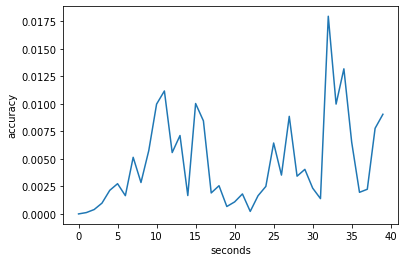

In [78]:
plt.plot(acc)
plt.xlabel('seconds')
plt.ylabel('accuracy')